In [8]:
import pandas as pd
df = pd.read_csv("C:/Users/seque/Downloads/american_bankruptcy.csv")
df

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [9]:
new_column_names = {
    'X1': 'Current Assets',
    'X2': 'Cost of Goods Sold',
    'X3': 'Depreciation and Amortization',
    'X4': 'EBITDA',
    'X5': 'Inventory',
    'X6': 'Net Income',
    'X7': 'Total Receivables',
    'X8': 'Market Value',
    'X9': 'Net Sales',
    'X10': 'Total Assets',
    'X11': 'Total Long-term Debt',
    'X12': 'EBIT',
    'X13': 'Gross Profit',
    'X14': 'Total Current Liabilities',
    'X15': 'Retained Earnings',
    'X16': 'Total Revenue',
    'X17': 'Total Liabilities',
    'X18': 'Total Operating Expenses'
}
df.rename(columns=new_column_names, inplace=True) # renamed as per the column data provided on kaggle

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   Current Assets                 78682 non-null  float64
 4   Cost of Goods Sold             78682 non-null  float64
 5   Depreciation and Amortization  78682 non-null  float64
 6   EBITDA                         78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net Income                     78682 non-null  float64
 9   Total Receivables              78682 non-null  float64
 10  Market Value                   78682 non-null  float64
 11  Net Sales                      78682 non-null  float64
 12  Total Assets                   78682 non-null 

In [11]:
df.isna().sum()

company_name                     0
status_label                     0
year                             0
Current Assets                   0
Cost of Goods Sold               0
Depreciation and Amortization    0
EBITDA                           0
Inventory                        0
Net Income                       0
Total Receivables                0
Market Value                     0
Net Sales                        0
Total Assets                     0
Total Long-term Debt             0
EBIT                             0
Gross Profit                     0
Total Current Liabilities        0
Retained Earnings                0
Total Revenue                    0
Total Liabilities                0
Total Operating Expenses         0
dtype: int64

## We can conclude that the dataset is clean and the features have all the correct intended datatypes and it has no null values

In [12]:
df['year'] = df['year'].astype(str)

In [13]:
df['status_label'].value_counts()

status_label
alive     73462
failed     5220
Name: count, dtype: int64

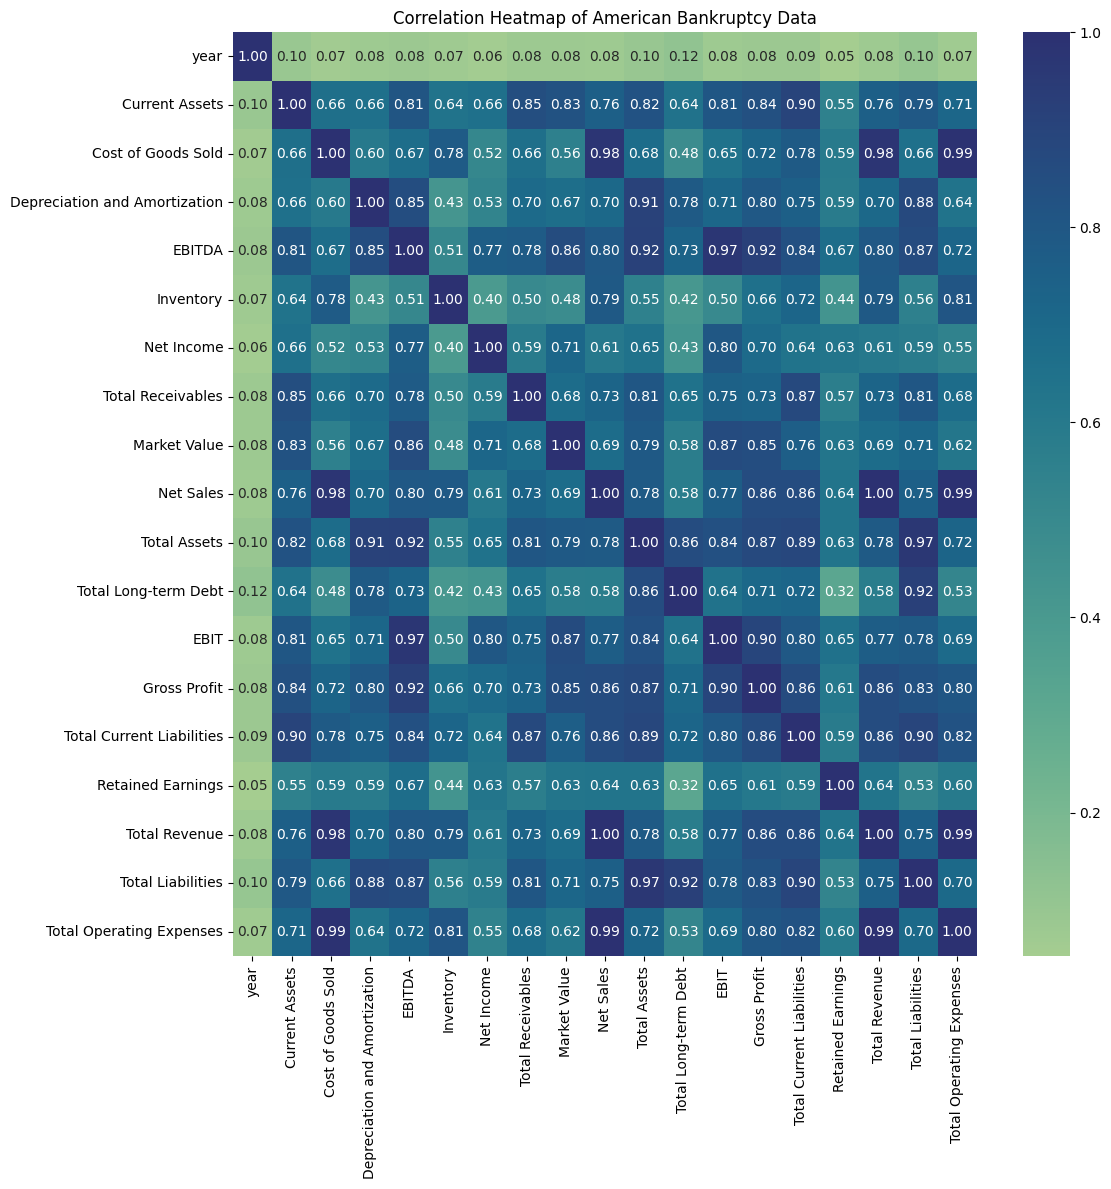

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = df.drop(['company_name','status_label'], axis=1)
plt.figure(figsize=(12, 12))
sns.heatmap(df1.corr(), annot=True, fmt='.2f', cmap='crest')
plt.title('Correlation Heatmap of American Bankruptcy Data')
plt.show()


In [15]:
df.drop(['EBIT', 'Depreciation and Amortization'], axis=1, inplace=True)

## We Decided to drop 'EBIT' and 'Depreciation and Amortization' since they are the components for the feature 'EBITDA' hence they just cause redundancy and have high correlation with EBITDA

In [16]:
import random
random_alive = []
for i in range(3):
  random_alive.append(random.choice(df[df['status_label'] == 'alive']['company_name'].unique()))

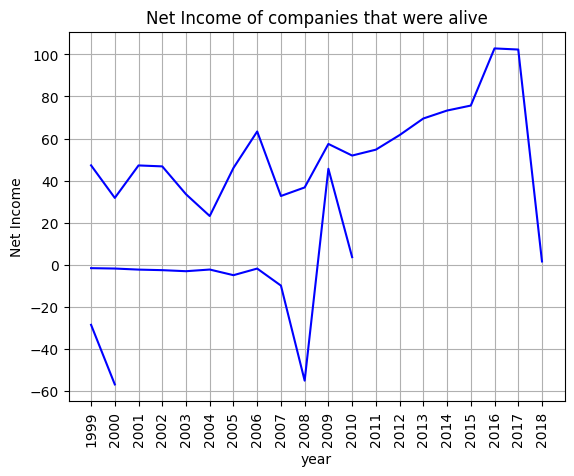

In [17]:
for i in random_alive:
  sns.lineplot(data=df[df['company_name'] == i] , x='year', y='Net Income', color='blue').tick_params(axis='x', labelrotation=90)
plt.title('Net Income of companies that were alive')
plt.grid()
plt.show()

In [18]:
import random
random_failed = []
for i in range(3):
  random_failed.append(random.choice(df[df['status_label'] == 'failed']['company_name'].unique()))

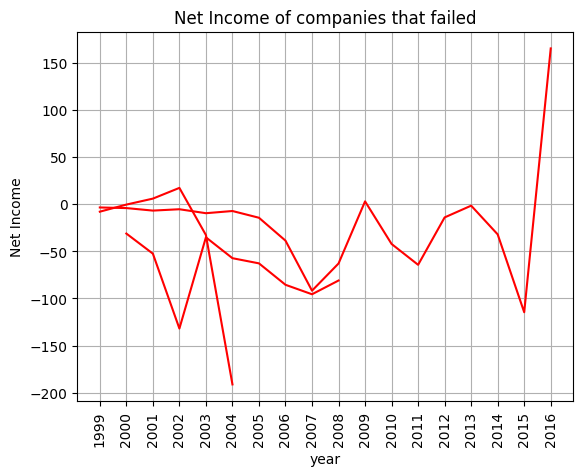

In [19]:
for i in random_failed:
  sns.lineplot(data=df[df['company_name'] == i] , x='year', y='Net Income', color='red').tick_params(axis='x', labelrotation=90)
plt.title('Net Income of companies that failed')
plt.grid()
plt.show()

## On looking at the Net Income of 3 random companies that have failed we observe that the net income of failed company has been constantly been zero or negative over the years and vice versa for the comapanies that are alive

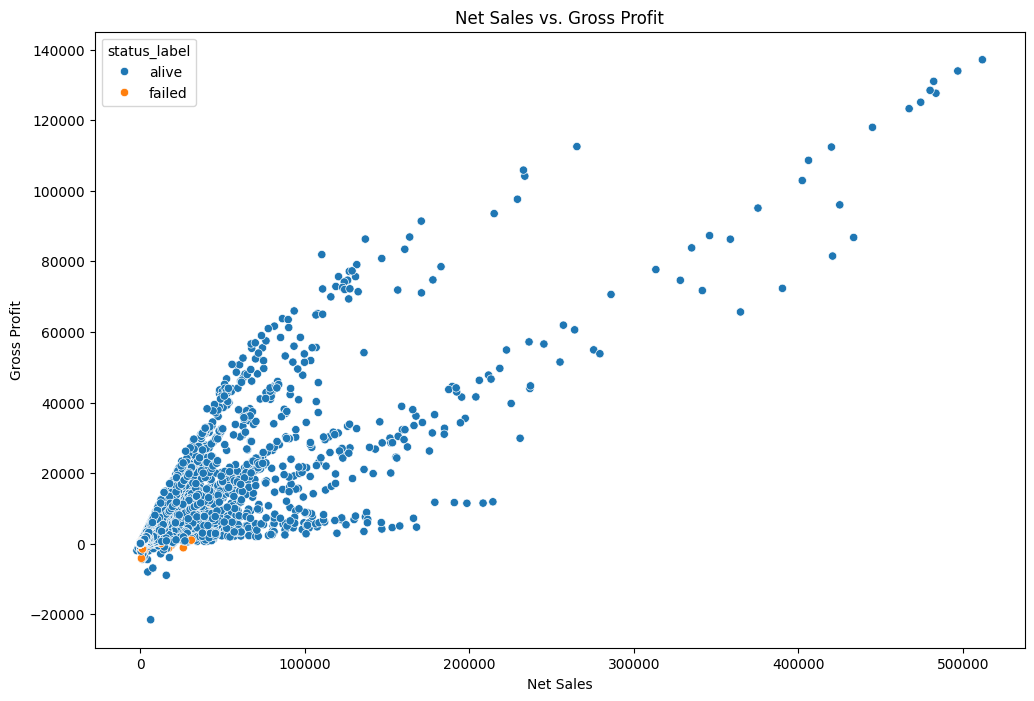

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Net Sales', y='Gross Profit', hue='status_label')
plt.title('Net Sales vs. Gross Profit')
plt.show()

# We observe that most of the comapnies have a really low gross profit and Net Sales for every year it has failed (Highlighted by the orange colour)

In [21]:
df_alive = df[df['status_label'] == 'alive']
df_failed = df[df['status_label'] == 'failed']

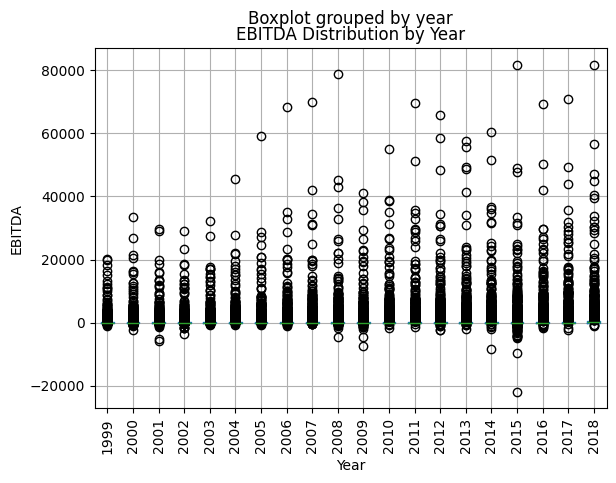

In [22]:
df.boxplot(column='EBITDA', by='year')
plt.title('EBITDA Distribution by Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('EBITDA')
plt.show()

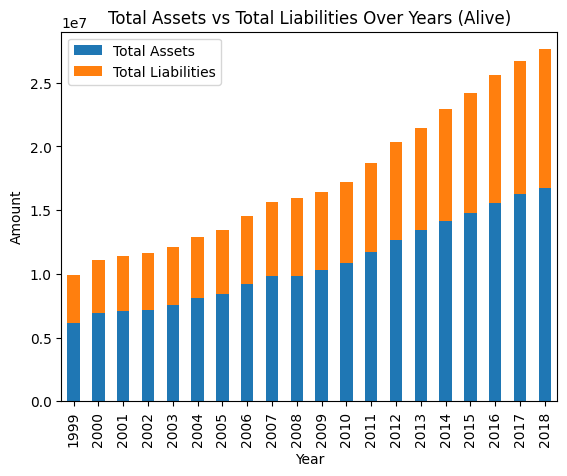

In [23]:
df_alive.groupby('year')[['Total Assets', 'Total Liabilities']].sum().plot(kind='bar', stacked=True)
plt.title('Total Assets vs Total Liabilities Over Years (Alive)')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

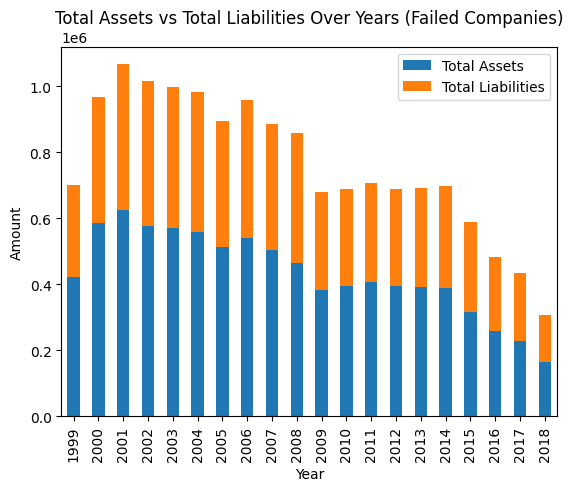

In [24]:
df_failed.groupby('year')[['Total Assets', 'Total Liabilities']].sum().plot(kind='bar', stacked=True)
plt.title('Total Assets vs Total Liabilities Over Years (Failed Companies)')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

## On analysing the graphs the total assets of comapanies that are alive is increasing at a higher rate than the liabilities, have stayed the same or decreased while its the opposite for the failed companies

c:\Users\seque\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\seque\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'No of comapnies alive and failed over the years')

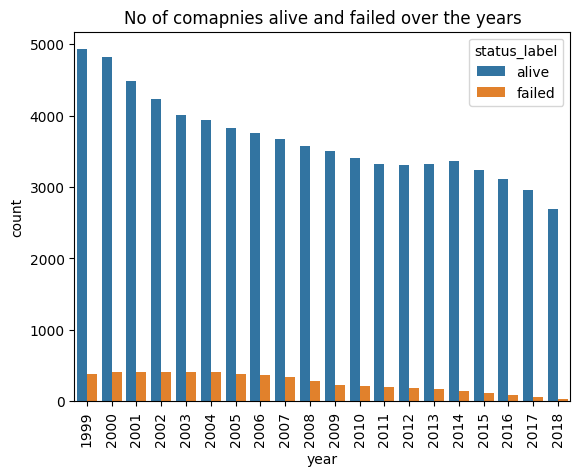

In [25]:
sns.countplot(data=df , x='year', hue='status_label').tick_params(axis='x', labelrotation=90)
plt.title('No of comapnies alive and failed over the years')

In [26]:
df['status_label'] = df['status_label'].map({'alive': 1, 'failed': 0})

In [27]:
df['year'] = df['year'].astype(float)

In [28]:
X = df.drop(['status_label','company_name','year'],axis=1)
y = df['status_label']

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Current Assets             78682 non-null  float64
 1   Cost of Goods Sold         78682 non-null  float64
 2   EBITDA                     78682 non-null  float64
 3   Inventory                  78682 non-null  float64
 4   Net Income                 78682 non-null  float64
 5   Total Receivables          78682 non-null  float64
 6   Market Value               78682 non-null  float64
 7   Net Sales                  78682 non-null  float64
 8   Total Assets               78682 non-null  float64
 9   Total Long-term Debt       78682 non-null  float64
 10  Gross Profit               78682 non-null  float64
 11  Total Current Liabilities  78682 non-null  float64
 12  Retained Earnings          78682 non-null  float64
 13  Total Revenue              78682 non-null  flo

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

gbc = GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=0.1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [49]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = gbc.predict(X_test)
print("F1 SCORE: ",f1_score(y_test,y_pred))
print("ACCURACY SCORE: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


F1 SCORE:  0.9658440276406712
ACCURACY SCORE:  0.9340393984325355
              precision    recall  f1-score   support

           0       0.58      0.02      0.04      1566
           1       0.93      1.00      0.97     22039

    accuracy                           0.93     23605
   macro avg       0.76      0.51      0.50     23605
weighted avg       0.91      0.93      0.90     23605



In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

rfc = RandomForestClassifier(random_state=42, n_estimators=200)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, rfc_pred)
rfc_f1_score = f1_score(y_test, rfc_pred, average='weighted') 

print("Random Forest:")
print("Accuracy:", rfc_accuracy)
print("F1-score:", rfc_f1_score)

Random Forest:
Accuracy: 0.9376826943444185
F1-score: 0.9116444705178587


In [52]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
xgb = XGBClassifier(objective='binary:logistic', random_state=42) 
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')

print("\nXGBoost:")
print("Accuracy:", xgb_accuracy)
print("F1-score:", xgb_f1_score)

AttributeError: module 'pandas' has no attribute 'util'

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

rskfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

gbc = GradientBoostingClassifier(random_state=42)

scores = cross_val_score(gbc, X, y, cv=rskfold, scoring='accuracy')

accuracy = scores.mean()

print('Accuracy:', accuracy)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [300, 500, 1000],
    'learning_rate': [0.05, 0.075, 0.1],
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42, n_estimators=300, learning_rate=0.1), param_grid, scoring='accuracy')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best f1 score:', best_score)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)